In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 计算自相关系数

In [2]:
def caculatePk(y, lag, method):
    if method == "LB":
        lag += 1
    Pk = np.ones(lag)
    N = len(y)
    u = y.mean()
    for k in range(0, lag):
        upsum = 0
        downsum = 0
        for i in range(0, N - k):
            upsum += (y[i] - u) * (y[i + k] - u)
        for i in range(0, N):
            downsum += (y[i] - u) ** 2
        Pk[k] = (upsum / downsum)
    return Pk

# 画图函数

In [29]:
def drawer(y, Pk):
    plt.figure(figsize=(10,8))
    timeSequence = plt.subplot2grid((2, 1), (0, 0))
    acf = plt.subplot2grid((2, 1), (1, 0))

    twosigma = np.ones(len(Pk))
    n = len(y)
    twosigma[0] = ((1 / n) ** 0.5)
    for i in range(1, len(Pk)):
        sum = 0
        for j in range(0, i):
            sum += Pk[j] ** 2
        twosigma[i] = (((1 / n) * (1 + 2 * sum)) ** 0.5)

    acf.bar(range(len(Pk)), Pk)
    acf.fill_between(range(len(Pk)), -1 * twosigma, twosigma, color='lightblue')
    acf.set_title('Autocorrelation')
    timeSequence.set_title('Time Series Analysis Plots')
    timeSequence.plot(y, "-*")
    
    plt.show()
    plt.close()

# 序列生成函数

In [4]:
def outputSeries(x1, x2):
    output = np.zeros(101)
    if(x2 != 0):
        output[0] = np.random.normal(0, 1, 1)
        output[1] = np.random.normal(0, 1, 1)
    for i in range(1, 101):
        output[i] = output[i-1] * x1 + output[i-2] * x2 + np.random.normal(0, 1, 1)
    return output

# 生成相关序列

In [5]:
Series = []
Series.append(outputSeries(0.8, 0))
Series.append(outputSeries(-1.1, 0))
Series.append(outputSeries(1, -0.5))
Series.append(outputSeries(1, 0.5))
Series.append(outputSeries(-0.9, 0))
Series.append(outputSeries(0.9, -0.2))

# 画图

第 1 题：



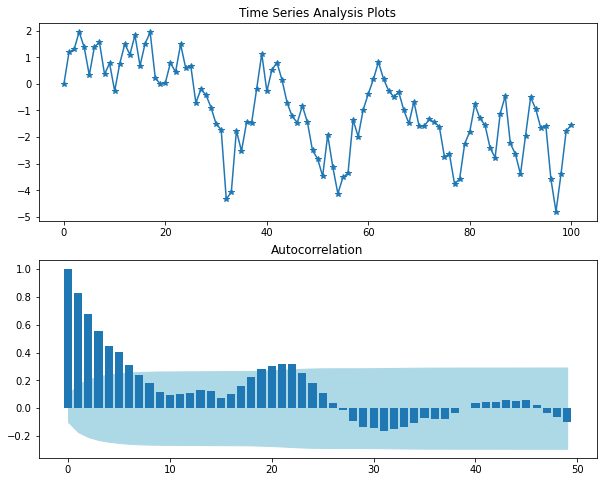

第 2 题：



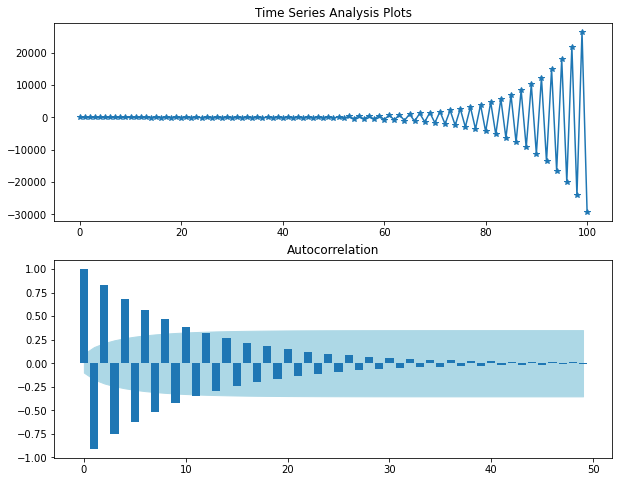

第 3 题：



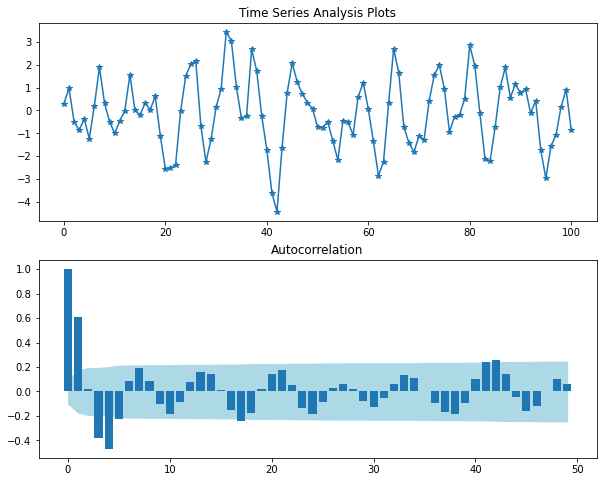

第 4 题：



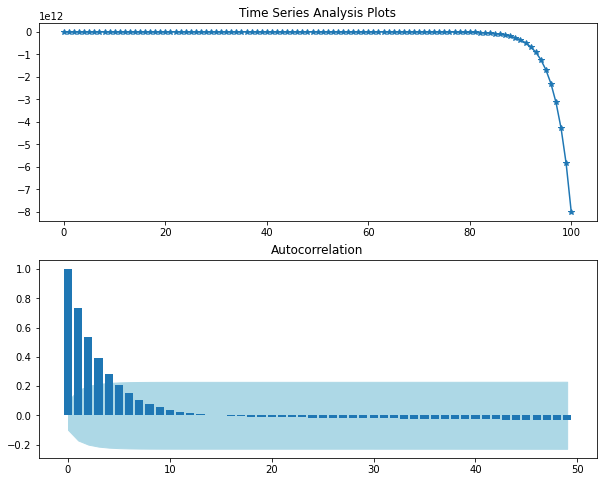

第 5 题：



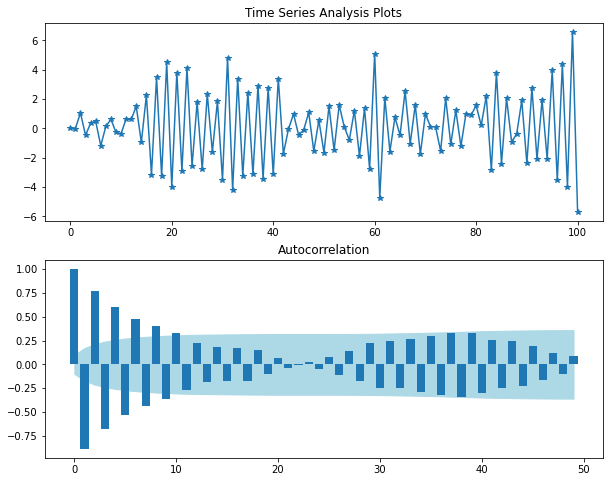

第 6 题：



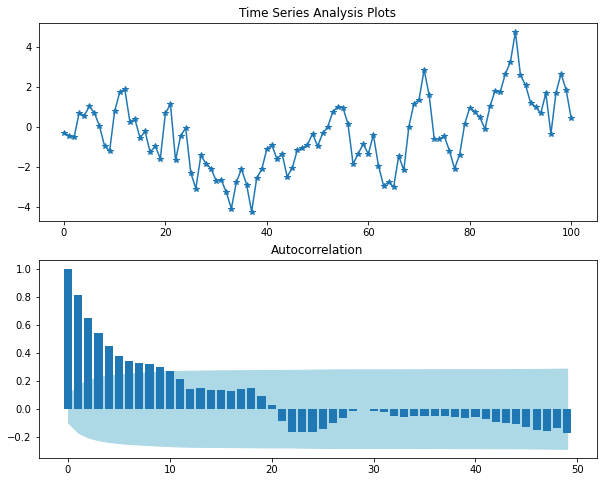

In [30]:
i=1
for index,item in enumerate(Series): 
    Pk = caculatePk(item, 50, "")
    print('第',i,'题：\n')
    drawer(item,Pk)
    i = i+1